In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('D:\\CSVFiles\\ratings_Electronics.csv')

In [5]:
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [8]:
data.columns = ['userid', 'prodid', 'rating', 'prodname']

In [9]:
data.head()

,userid,prodid,rating,prodname
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [12]:
data1 = data.drop('prodname', axis=1) #keeping only prodid.

In [14]:
data1.head(10)

,userid,prodid,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
5,A3J3BRHTDRFJ2G,0511189877,2.0
6,A2TY0BTJOTENPG,0511189877,5.0
7,A34ATBPOK6HCHY,0511189877,5.0
8,A89DO69P0XZ27,0511189877,5.0
9,AZYNQZ94U6VDB,0511189877,5.0


In [16]:
data1.shape

(7824481, 3)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userid    object
prodid    object
rating    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [18]:
data1.isnull().sum() #no missing values.

userid    0
prodid    0
rating    0
dtype: int64

In [21]:
data1.describe(include = 'all').T #ratings scale is from 1 to 5. Also, there are 4201696 unique users and 476001 unique products.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userid,7824481,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prodid,7824481,476001,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


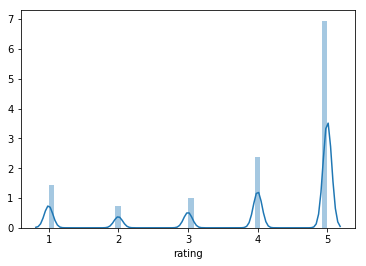

In [26]:
sns.distplot(data1['rating'])

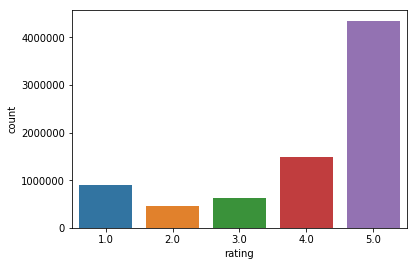

In [29]:
sns.countplot(x = 'rating', data = data1)

In [30]:
top10rated = data.groupby('userid').size().sort_values(ascending=False)[:10]

In [31]:
top10rated

userid
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [32]:
counts = data['userid'].value_counts()

In [34]:
type(counts)

pandas.core.series.Series

In [35]:
counts[:20]

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
Name: userid, dtype: int64

In [37]:
data2 = pd.DataFrame()

In [49]:
data2 = data1[data1['userid'].isin(counts[counts >= 50].index)]

In [50]:
data2.shape

(125871, 3)

In [51]:
data2.head()

,userid,prodid,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [52]:
data2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userid,125871,1540,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prodid,125871,48190,B0088CJT4U,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,125871,NaN,NaN,NaN,4.26134,1.06214,1,4,5,5,5


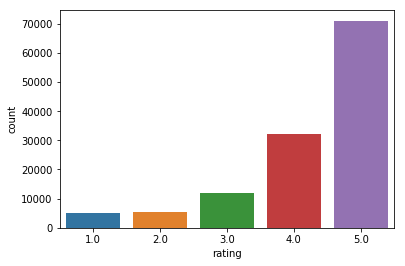

In [53]:
sns.countplot(x = 'rating', data = data2)

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.25, random_state=1)

In [58]:
train.head()

,userid,prodid,rating
2697953,A10PEXB6XAQ5XF,B002M3SOBU,4.0
529398,A3QRW0UJPKIAX7,B00030F7I2,5.0
4587983,A25TQLMIAPI1T6,B004Z02XK6,5.0
6217373,ARBKYIVNYWK3C,B008G4SFJA,5.0
3337539,A3AYSYSLHU26U9,B003FMVCRU,4.0


In [60]:
train.shape

(94403, 3)

In [61]:
test.shape

(31468, 3)

In [62]:
#popluarity recommendation based on products having highest ratings and highest user review ratings count.
train.groupby('prodid')['rating'].mean().sort_values(ascending=False).head()

prodid
B00LKG1MC8    5.0
B002PJFAEA    5.0
B002P6MPZ0    5.0
B002P6W9UG    5.0
B002P6Y4HC    5.0
Name: rating, dtype: float64

In [63]:
train.groupby('prodid')['rating'].count().sort_values(ascending=False).head()

prodid
B0088CJT4U    166
B003ES5ZUU    134
B000N99BBC    132
B007WTAJTO    120
B00829TIEK    108
Name: rating, dtype: int64

In [64]:
prod_ratings_mean_count = pd.DataFrame(train.groupby('prodid')['rating'].mean()) 

In [65]:
prod_ratings_mean_count['ratingcount'] = pd.DataFrame(train.groupby('prodid')['rating'].count()) 

In [70]:
prod_ratings_mean_count.head()

,rating,ratingcount
prodid,,
0594451647,5.0,1
0970407998,2.5,2
0972683275,5.0,2
1400501466,3.0,2
1400501520,5.0,1


In [73]:
prod_ratings_mean_count = prod_ratings_mean_count.sort_values(['rating', 'ratingcount'], ascending=False)

In [74]:
prod_ratings_mean_count.head() #the electronic products have been arranged here according to the average ratings and count of those ratings. We can use the topmost products that have highest ratings and maximum ratings given by existing users for recoomendations.

,rating,ratingcount
prodid,,
B0052SCU8U,5.0,35
B0046TJG1U,5.0,17
B000F7QRTG,5.0,15
B003MTTJOY,5.0,15
B00HG1L334,5.0,15


In [104]:
popularity_recommendation1 = prod_ratings_mean_count.head() #getting top 5 recommendations

In [82]:
train.head()

,userid,prodid,rating
2697953,A10PEXB6XAQ5XF,B002M3SOBU,4.0
529398,A3QRW0UJPKIAX7,B00030F7I2,5.0
4587983,A25TQLMIAPI1T6,B004Z02XK6,5.0
6217373,ARBKYIVNYWK3C,B008G4SFJA,5.0
3337539,A3AYSYSLHU26U9,B003FMVCRU,4.0


In [87]:
# popularity recommendation based on highest purchase of the products by the users. 
train.groupby('prodid').agg({'userid': 'count'}).head(10)

,userid
prodid,
0594451647,1
0970407998,2
0972683275,2
1400501466,2
1400501520,1
1400501776,2
1400532620,2
1400532655,3
140053271X,2


In [88]:
prod_user_count = pd.DataFrame(train.groupby('prodid')['userid'].count())

In [90]:
prod_user_count.head()

,userid
prodid,
0594451647,1
0970407998,2
0972683275,2
1400501466,2
1400501520,1


In [94]:
prod_user_count.rename(columns = {'userid': 'usercount'},inplace=True)

In [95]:
prod_user_count.head()

,usercount
prodid,
0594451647,1
0970407998,2
0972683275,2
1400501466,2
1400501520,1


In [96]:
prod_user_count = prod_user_count.sort_values(['usercount'], ascending=False)

In [97]:
prod_user_count.head(10) #recommending products that have been highly purchased by existing users using the list of this dataframe.

,usercount
prodid,
B0088CJT4U,166
B003ES5ZUU,134
B000N99BBC,132
B007WTAJTO,120
B00829TIEK,108
B002R5AM7C,102
B008DWCRQW,101
B004CLYEDC,98
B00829THK0,94


In [109]:
popularity_recommendation2 = prod_user_count.head() #getting top 5 recommendations

In [113]:
def recommend(userid, recommendation):     
    user_recommendations = recommendation
    
    user_recommendations['userid'] = userid 
      
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [115]:
recommend(24,popularity_recommendation2) #recommendation for userid 24 with 2nd type of popularity based recommendation system.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,userid,usercount
prodid,,
B0088CJT4U,24,166
B003ES5ZUU,24,134
B000N99BBC,24,132
B007WTAJTO,24,120
B00829TIEK,24,108


In [116]:
recommend(24,popularity_recommendation1) #recommendation for userid 150 with 1st type of popularity based recommendation system.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,userid,rating,ratingcount
prodid,,,
B0052SCU8U,24,5.0,35
B0046TJG1U,24,5.0,17
B000F7QRTG,24,5.0,15
B003MTTJOY,24,5.0,15
B00HG1L334,24,5.0,15


In [118]:
#User-based Collaborative Filtering
data3 = pd.concat([train, test])
data3.head(10)

,userid,prodid,rating
2697953,A10PEXB6XAQ5XF,B002M3SOBU,4.0
529398,A3QRW0UJPKIAX7,B00030F7I2,5.0
4587983,A25TQLMIAPI1T6,B004Z02XK6,5.0
6217373,ARBKYIVNYWK3C,B008G4SFJA,5.0
3337539,A3AYSYSLHU26U9,B003FMVCRU,4.0
7824062,A328S9RN3U5M68,B00L21HC7A,5.0
3781816,A22CW0ZHY3NJH8,B0041OSQB6,4.0
1870088,ANW6EGY12V5XS,B001B41X7I,5.0
687378,A3E3EQ39FZTZEK,B0009VKJH4,5.0
4024137,A3JUHP1E3WUHEA,B004CLYE8C,4.0


In [172]:
# Matrix with row for each userid and column for each prodid
pivot = data3.pivot(index = 'userid', columns ='prodid', values = 'rating').fillna(0)
pivot1 = pivot

In [184]:
pivot.shape

(1540, 48190)

In [185]:
pivot.head(10)

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10H24TDLK2VDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10NMELR4KX0J6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10O7THJ2O20AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
pivot['userindex'] = np.arange(0, pivot.shape[0], 1)
pivot.head()

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,userindex
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [187]:
pivot.set_index(['userindex'], inplace=True)

In [188]:
pivot.head()

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userindex,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot, k = 50)

In [190]:
sigma

array([ 66.16942358,  66.26045906,  66.5326469 ,  66.73322244,
        66.90754989,  67.13857643,  67.52729531,  67.65247592,
        67.97832692,  68.1926043 ,  68.431321  ,  68.70278398,
        69.17715066,  69.84552982,  69.98332317,  70.19621309,
        70.3835867 ,  70.5901626 ,  70.99498997,  71.47879811,
        71.60653312,  72.39116477,  72.94294663,  73.4307746 ,
        73.49070971,  74.13638941,  74.28327666,  74.47029584,
        74.99962629,  75.70165196,  76.31608552,  76.53336712,
        77.34117065,  77.76866606,  78.63158661,  79.39214749,
        80.2967454 ,  80.95856309,  82.19795763,  83.3788163 ,
        87.43474122,  88.68897677,  91.15027972,  92.15989229,
        95.03789667,  98.21626326, 100.38232831, 107.7090351 ,
       119.69501814, 182.29276718])

In [191]:
sigma = np.diag(sigma)
sigma

array([[ 66.16942358,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  66.26045906,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  66.5326469 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 107.7090351 ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        119.69501814,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 182.29276718]])

In [192]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [193]:
predictions = pd.DataFrame(all_users_predicted_ratings, columns = pivot.columns)

In [194]:
predictions.head()

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [210]:
def recommend1(userid, pivot, predictions, num_recommendations):
      
    userid = userid # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot.iloc[userid].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = predictions.iloc[userid].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user ID = {}):\n'.format(userid))
    print(temp.head(num_recommendations))

In [211]:
pivot.sample(2)

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userindex,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
userid = 254
num_recommendations = 5
recommend1(userid, pivot, predictions, num_recommendations)


Below are the recommended items for user(user ID = 254):

                   user_ratings  user_predictions
Recommended Items                                
B000VX6XL6                  0.0          0.372659
B001XURP7W                  0.0          0.346806
B006W8U2MU                  0.0          0.340061
B003ES5ZUU                  0.0          0.291143
B002WE6D44                  0.0          0.284530


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [213]:
userid = 1377
num_recommendations = 10
recommend1(userid, pivot, predictions, num_recommendations)


Below are the recommended items for user(user ID = 1377):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.693241
B008DWCRQW                  0.0          1.233339
B004CLYEFK                  0.0          0.877611
B004CLYEE6                  0.0          0.872701
B003CFATT2                  0.0          0.822558
B00ARB5FLQ                  0.0          0.785423
B004T9RR6I                  0.0          0.650889
B00829TIEK                  0.0          0.565111
B00HSQAIQU                  0.0          0.548174
B009SYZ8OC                  0.0          0.538233


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [198]:
#Model Evaluation
pivot1.mean().head()

prodid
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [199]:
predictions.head()

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [200]:
predictions.mean().head()

prodid
0594451647    0.001953
0594481813    0.002875
0970407998    0.003355
0972683275    0.010343
1400501466    0.004871
dtype: float64

In [201]:
rmse = pd.concat([pivot1.mean(), predictions.mean()], axis=1)
rmse.columns = ['avg_actual_ratings', 'avg_predicted_ratings']

In [202]:
rmse.head()

,avg_actual_ratings,avg_predicted_ratings
prodid,,
0594451647,0.003247,0.001953
0594481813,0.001948,0.002875
0970407998,0.003247,0.003355
0972683275,0.012338,0.010343
1400501466,0.012987,0.004871


In [203]:
rmse.shape

(48190, 2)

In [204]:
rmse['item_index'] = np.arange(0, rmse.shape[0], 1)

In [205]:
rmse.head()

,avg_actual_ratings,avg_predicted_ratings,item_index
prodid,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


In [206]:
RMSE = round((((rmse.avg_actual_ratings - rmse.avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00275 



In [207]:
#recommending 5 new products
pivot.sample(1)

prodid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userindex,,,,,,,,,,,,,,,,,,,,,
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
userid = 351
num_recommendations = 5
recommend1(userid, pivot, predictions, num_recommendations)


Below are the recommended items for user(user ID = 351):

                   user_ratings  user_predictions
Recommended Items                                
B002R5AM7C                  0.0          2.280224
B008X9Z528                  0.0          1.732137
B005FYNSPK                  0.0          1.712026
B00017LSPI                  0.0          1.559468
B004TKTOWC                  0.0          1.523679


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [216]:
#Popularity based recommendation system
''' These recommendation systems are generalized and the simplest form of recommedation model.
They are commonnly used when we have no prior information regarding the user, 
hence we recommend him/her according to the popular content or products. 
Therefore this is a non-personalized recommendation system and will have same recommendations for all the users. '''

' these recommendation systems are generalized and the simplest form of recommedation model.\nThey are commonnly used when we have no prior information regarding the user, \nhence we recommend him/her according to the popular content or products. \nTherefore this is a non-personalized recommendation system and will have same recommendations for all the users. '

In [217]:
#Collaborative Filtering Recommendation system
''' These  recommendation systems are personalized models. 
 It utilizes the user’s behaviour or information to recommend items/ content accordingly. 
 Therefore, for each user the items recommended would be different which depends on their preferences.'''

' These  recommendation systems are personalized models. \n It utilizes the user’s behaviour or information to recommend items/ content accordingly. \n Therefore, for each user the items recommended would be different which depends on their preferences.'